# 决策树参考代码

## 1.决策树特征变量选择的指标计算

In [95]:
from math import log
import pandas as pd
data=pd.read_excel("/Users/yangwei/Desktop/决策树实践/决策树数据.xlsx")
data=data.drop(columns="ID")
data

,年龄,有工作,有自己的房子,信贷情况,类别
0,青年,否,否,一般,否
1,青年,否,否,好,否
2,青年,是,否,好,是
3,青年,是,是,一般,是
4,青年,否,否,一般,否
5,中年,否,否,一般,否
6,中年,否,否,好,否
7,中年,是,是,好,是
8,中年,否,是,非常好,是
9,中年,否,是,非常好,是


### 计算熵

In [4]:
#计算某列的熵
def calcEnt(coldata):
    num=len(coldata)                                #样本数
    attr_counts={}                                  #保存每个属性出现次数的字典                                     
    for attr in coldata:                            #对每个特征向量的属性进行统计
        current_attr=attr                           #提取属性信息
        if current_attr not in attr_counts.keys():  #如果属性没有放入统计次数的字典，添加进去
              attr_counts[current_attr]=0           #初始化属性个数为0
        attr_counts[current_attr]+=1                #属性计数

    Ent=0.0                                         #初始化熵
                                                    #计算熵
    for key in attr_counts:
        prob=float(attr_counts[key])/num            #该属性的概率
        Ent-=prob*log(prob,2)                       #利用公式计算
    return Ent                                      #返回熵

In [5]:
calcEnt(data['类别']) #得出类别的熵值

0.9709505944546686

In [6]:
calcEnt(data['年龄']) #得出年龄的熵值

1.584962500721156

**纯度越高，熵越小；越混乱，熵越大**

**一共15个样本，“类别”列分成了两个属性（“是”或“否”），而“年龄”列分成了三个属性（“青年“，”中年“或”老年“），相比而言，”类别“列纯度比“年龄”列高一些，所以其熵的值比“年龄”列低一些**

### 计算条件熵

In [7]:
#计算条件熵
def calcCondiEnt(coldata1,coldata2):  #coldata2为条件、特征；coldata1为输出、类别
    nrow=len(coldata1)                #样本数
    CondiEnt=0.0                      #初始化条件熵
    for attr in set(coldata2):
        sub_coldata1=coldata1[coldata2==attr]
        sub_num=len(sub_coldata1)
        subEntropy=calcEnt(sub_coldata1)  #计算每个子集的熵
        CondiEnt+=subEntropy*sub_num/nrow #计算条件熵
    return CondiEnt 

In [8]:
calcCondiEnt(data['类别'],data['年龄'])

0.8879430945988998

In [9]:
calcCondiEnt(data['类别'],data['有工作'])

0.6473003963031124

In [10]:
calcCondiEnt(data['类别'],data['有自己的房子'])

0.5509775004326938

In [11]:
calcCondiEnt(data['类别'],data['信贷情况'])

0.6079610319175832

**在某特征下输出的条件熵越小，说明在该特征下输出的不确定性越小，纯度越高**

**'有自己的房子'下的'类别'条件熵最小，说明是否'有自己的房子'的'类别'的纯度最高，不确定性最低**

### 计算信息增益

In [19]:
#计算信息增益，并选出信息增益最大的特征
def InfoGain_BestFeature(data): #以最后一列为输出，其他列为特征
    Features=data.columns
    InfoGains={}
    baseEntropy=calcEnt(data[Features[-1]])   #输出的熵
    for Feature in Features[:-1]:
        CondiEnt=calcCondiEnt(data[Features[-1]],data[Feature]) #计算条件熵
        InfoGain=baseEntropy-CondiEnt                          #计算信息增益
        InfoGains[Feature]=InfoGain
    for Feature,InfoGain in InfoGains.items():                 #找出信息增益最大的特征
        if(InfoGain == max(InfoGains.values())):
            print("信息增益最大的特征为:"+Feature) 
    return InfoGains

In [20]:
InfoGain_BestFeature(data)

信息增益最大的特征为:有自己的房子


{'年龄': 0.08300749985576883,
 '有工作': 0.32365019815155616,
 '有自己的房子': 0.4199730940219748,
 '信贷情况': 0.36298956253708536}

**特征引起的信息增益越大，说明该特征对于输出的区分能力越强**

**'有自己的房子'引起的信息增益最大，说明该特征下对于类别'的区分程度最高，应选择此特征作为分裂的节点**

### 计算信息增益比

In [21]:
#计算信息增益比，并并选出信息增益比最大的特征
def GainRatio_BestFeature(data): #以最后一列为输出，其他列为特征
    Features=data.columns
    InfoGains=InfoGain_BestFeature(data)                  #计算信息增益
    GainRatios={}
    for Feature in Features[:-1]:
        FeatureEnt=calcEnt(data[Feature])                 #计算对应特征的熵
        GainRatios[Feature]=InfoGains[Feature]/FeatureEnt #计算对应特征的信息增益比
    for Feature,GainRatio in GainRatios.items():          #找出信息增益比最大的特征
        if(GainRatio == max(GainRatios.values())):
            print("信息增益比最大的特征为:"+Feature) 
    return  GainRatios

In [22]:
GainRatio_BestFeature(data)

信息增益最大的特征为:有自己的房子
信息增益比最大的特征为:有自己的房子


{'年龄': 0.05237190142858302,
 '有工作': 0.3524465495205018,
 '有自己的房子': 0.4325380677663125,
 '信贷情况': 0.23185388128724224}

**信息增益比修正了信息增益倾向与选择取值较多的特征的问题**

**'有自己的房子'引起的信息增益比最大，应选择此特征作为分裂的节点**

### 计算基尼系数

In [23]:
#计算基尼系数
def calcGini(coldata):
    num=len(coldata)                                #样本数
    attr_counts={}                                  #保存每个属性出现次数的字典                                     
    for attr in coldata:                            #对每个特征向量的属性进行统计
        current_attr=attr                           #提取属性信息
        if current_attr not in attr_counts.keys():  #如果属性没有放入统计次数的字典，添加进去
              attr_counts[current_attr]=0           #初始化属性个数为0
        attr_counts[current_attr]+=1                #属性计数

    Gini_prob=0.0                                   #初始化熵                                                    #计算熵
    for key in attr_counts:
        prob=float(attr_counts[key])/num            #该属性的概率
        Gini_prob+=prob**2                          #计算概率的平方和
    Gini=1-Gini_prob                                #计算基尼指数
    return Gini                                     #返回基尼指数

In [24]:
calcGini(data['类别'])

0.48

**基尼系数也是用来度量数据的不纯度。基尼系数越小，样本纯净度越高**

**基尼系数最小为0，即所有样本都属于一类**

In [25]:
#计算特征下的基尼系数
def calcCondiGini(coldata1,coldata2):  #coldata2为条件、特征；coldata1为输出、类别
    nrow=len(coldata1)                 #样本数
    CondiGini=0.0                      #初始化特征下的基尼系数
    for attr in set(coldata2):
        sub_coldata1=coldata1[coldata2==attr]
        sub_num=len(sub_coldata1)
        subGini=calcGini(sub_coldata1)  #计算每个子集的基尼系数
        CondiGini+=subGini*sub_num/nrow #计算特征下的基尼系数
    return CondiGini 

In [26]:
calcCondiGini(data['类别'],data['年龄'])

0.42666666666666664

In [27]:
#一次计算所有特征下的基尼系数，并返回基尼系数最小的特征
def CondiGini_BestFeature(data): #以最后一列为输出，其他列为特征
    Features=data.columns
    CondiGinis={}
    for Feature in Features[:-1]:
        CondiGini=calcCondiGini(data[Features[-1]],data[Feature]) #计算特征下的基尼系数
        CondiGinis[Feature]=CondiGini
    for Feature,CondiGini in CondiGinis.items():                 #找出基尼系数最小的特征
        if(CondiGini == min(CondiGinis.values())):
            print("基尼系数最小的特征为:"+Feature) 
    return CondiGinis

In [28]:
CondiGini_BestFeature(data)

基尼系数最小的特征为:有自己的房子


{'年龄': 0.42666666666666664,
 '有工作': 0.32,
 '有自己的房子': 0.26666666666666666,
 '信贷情况': 0.2844444444444444}

**特征下的基尼系数越小，说明该特征的分类能力越好**

**'有自己的房子'特征下'类别'的基尼系数最小，将其作为分裂的节点**

## 决策树分类简单案例

**依然用上面的案例数据**

**数据导入省略**

**描述性分析部分省略**

**这里将所有数据放入模型，进行训练**

### 特征编码(可尝试独热编码，看看效果）

In [29]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
data.head()

,年龄,有工作,有自己的房子,信贷情况,类别
0,2,0,0,0,0
1,2,0,0,1,0
2,2,1,0,1,1
3,2,1,1,0,1
4,2,0,0,0,0


### 拆分特征和标签

In [30]:
X=data.iloc[:,:-1] #特征
y=data.iloc[:,-1]  #输出

### 数据拆分

In [62]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.1)

###  决策树模型(信息增益准则）

In [63]:
from sklearn import tree
# min_sample_split表示划分节点的最小样本数量
# max_depth表示树的最大深度
# min_impurity_decrease表示继续划分的不纯度下降阈值
# 可以调整参数观察树形状的改变
ent_tree= tree.DecisionTreeClassifier(criterion="entropy", #信息增益
                                        min_samples_split=2,
                                        max_depth=5,
                                        min_impurity_decrease=0.0)
ent_tree.fit(Xtrain,Ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [64]:
ent_tree.score(Xtest,Ytest) #在测试集上的得分

1.0

In [65]:
ent_tree.predict_proba(Xtest)

array([[0., 1.],
       [0., 1.]])

In [96]:
ent_tree.feature_importances_ #特征的重要程度

array([0.        , 0.49860971, 0.50139029, 0.        ])

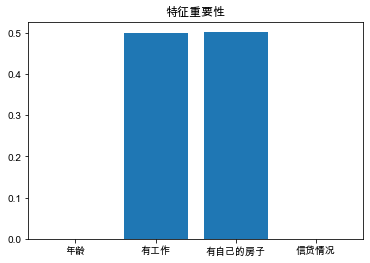

In [107]:
#plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.bar(height=ent_tree.feature_importances_,x=data.columns[:-1])
plt.title("特征重要性")
plt.show()

### 决策树可视化

In [30]:
import graphviz 
import pydotplus

In [68]:
dot_tree= tree.export_graphviz(ent_tree, out_file=None, 
                                feature_names=X.columns,
                                class_names=['否', '是'],
                                filled=True, rounded=True, 
                                special_characters=True)
graph_tree = pydotplus.graph_from_dot_data(dot_tree)

In [69]:
graph_tree.write_png("ent_tree.png")  # 保存图片

True

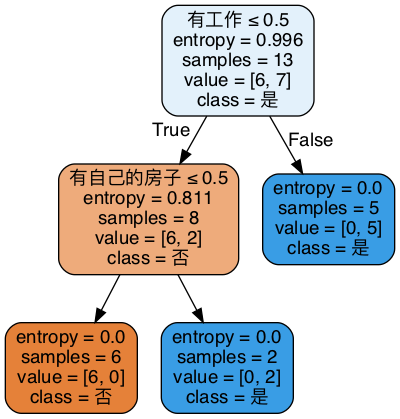

In [70]:
from IPython.display import Image
Image(graph_tree.create_png())

### 决策树(gini系数准则)及可视化

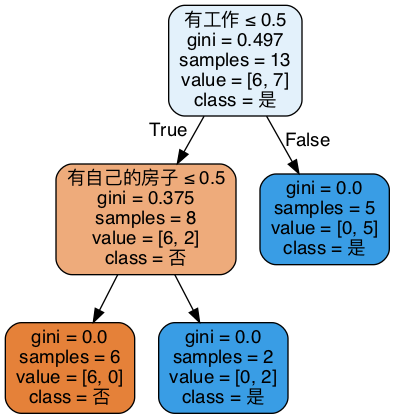

In [72]:
# min_sample_split表示划分节点的最小样本数量
# max_depth表示树的最大深度
# min_impurity_decrease表示继续划分的不纯度下降阈值
# 可以调整参数观察树形状的改变
gini_tree= tree.DecisionTreeClassifier(criterion="gini",
                                        min_samples_split=2,
                                        max_depth=5,
                                        min_impurity_decrease=0.0)
gini_tree.fit(Xtrain,Ytrain)

dot_tree= tree.export_graphviz(gini_tree, out_file=None, 
                                feature_names=X.columns,
                                class_names=['否', '是'],
                                filled=True, rounded=True, 
                                special_characters=True)
graph_tree = pydotplus.graph_from_dot_data(dot_tree)

from IPython.display import Image
Image(graph_tree.create_png())

In [73]:
gini_tree.score(Xtest,Ytest) #在测试集上的得分

1.0

### 交叉验证下的决策树建模的效果

In [75]:
from sklearn.model_selection import cross_val_score   #交叉验证
scores=cross_val_score(gini_tree,X,y,cv=3)

In [76]:
scores

array([0.8, 1. , 1. ])

In [77]:
scores.mean()

0.9333333333333332

## 决策树分类大案例

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

### 导入数据

In [108]:
data = pd.read_csv(r"/Users/yangwei/Desktop/决策树实践/泰坦尼克.csv") 
data.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 对数据进行预处理

In [110]:
#删除缺失值过多的列，和观察判断来说和预测的y没有关系的列
data.drop(["Cabin","Name","Ticket"],inplace=True,axis=1)#inplace=True指的是覆盖原表，False则会生成新表
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [111]:
#处理缺失值，对缺失值较多的列进行填补，有一些特征只缺失一两个值，可以采取直接删除记录的方法
data["Age"]=data["Age"].fillna(data["Age"].mean())
data = data.dropna()#默认axis = 0

In [112]:
#将分类变量（如object类型）转换为数值型变量
 
#将二分类变量转换为数值型变量
#astype能够将一个pandas对象转换为某种类型，和apply(int(x))不同，astype可以将文本类转换为数字，用这个方式可以很便捷地将二分类特征转换为0~1
data["Sex"]=(data["Sex"]== "male").astype("int") #.astype("int")将bool值转换为int类型
 
#将三分类变量转换为数值型变量
labels = data["Embarked"].unique().tolist()#tolist()将数组array变为列表list
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))
 
#查看处理后的数据集
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


### 提取标签和特征矩阵，分测试集和训练集

In [113]:
X = data.iloc[:,data.columns != "Survived"]
y = data.iloc[:,data.columns == "Survived"]

In [114]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)
 
#修正测试集和训练集的索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])
     
#查看分好的训练集和测试集
Xtrain.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,726,3,1,20.000000,0,0,8.6625,0
1,654,3,0,29.699118,0,0,7.8292,2
2,754,3,1,23.000000,0,0,7.8958,0
3,491,3,1,29.699118,1,0,19.9667,0
4,156,1,1,51.000000,0,1,61.3792,1


### 导入模型，粗略跑一下查看结果

In [140]:
clf=tree.DecisionTreeClassifier(random_state=25)
clf=clf.fit(Xtrain, Ytrain)

In [116]:
score_ = clf.score(Xtest, Ytest)
score_ 

0.7340823970037453

In [117]:
score = cross_val_score(clf,X,y,cv=10).mean()#使用交叉验证
score

0.7469611848825333

In [118]:
clf.feature_importances_ #特征的重要程度

array([0.19377531, 0.08416403, 0.30418498, 0.17706701, 0.05138511,
       0.02793173, 0.14633787, 0.01515397])

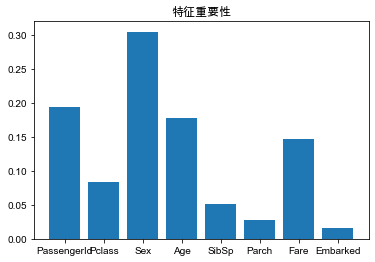

In [119]:
plt.bar(height=clf.feature_importances_ ,x=X.columns)
plt.title("特征重要性")
plt.show()

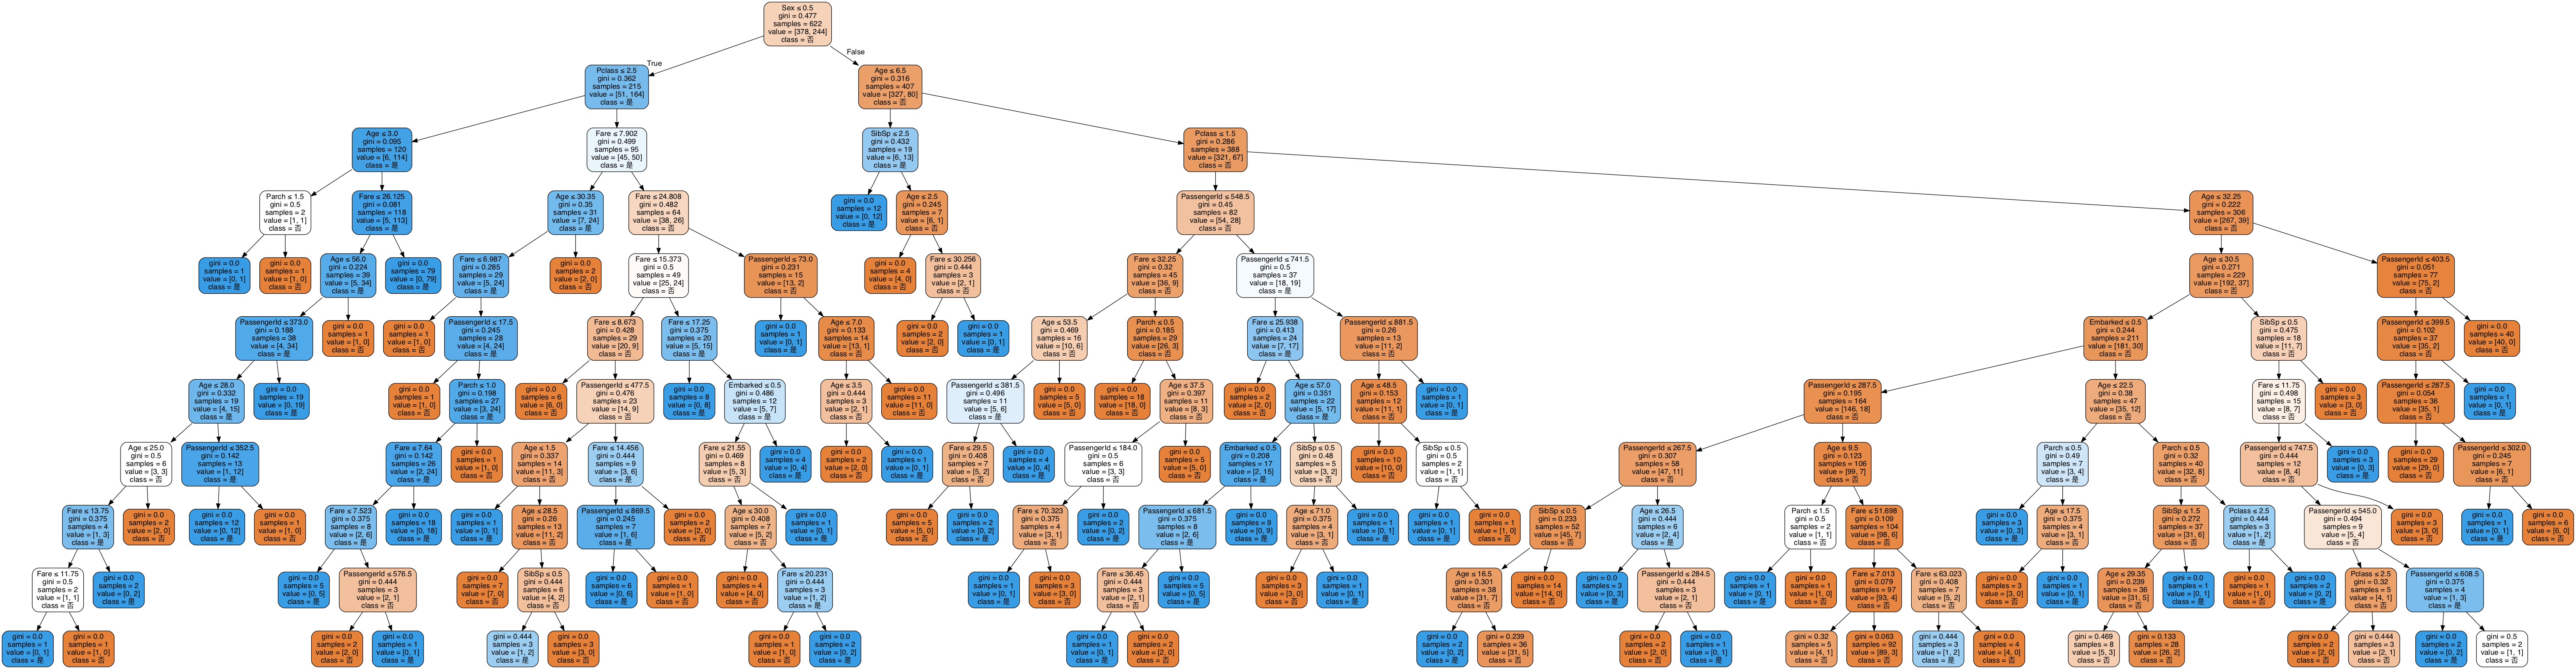

In [122]:
dot_tree= tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,
                                class_names=['否', '是'],
                                filled=True, rounded=True, 
                                special_characters=True)
graph_tree = pydotplus.graph_from_dot_data(dot_tree)
#graph_tree.write_png("tree3.png") 

from IPython.display import Image
Image(graph_tree.create_png())

### 在不同max_depth下观察模型的拟合状况

In [126]:
tr = []  #训练集分数
te = []  #测试集分数
for i in range(20):
    clf=tree.DecisionTreeClassifier(random_state=25,
                                 max_depth=i+1,
                                 criterion="gini"       #尝试调参，让结果更好
                                )
    clf = clf.fit(Xtrain, Ytrain)
    score_tr=clf.score(Xtrain,Ytrain)#训练集分数
    score_te = cross_val_score(clf,X,y,cv=10).mean()#测试集分数
    tr.append(score_tr)
    te.append(score_te)
print(max(te))

0.8143896833503576


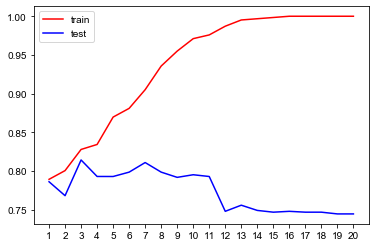

In [127]:
plt.plot(range(1,21),tr,color="red",label="train")
plt.plot(range(1,21),te,color="blue",label="test")
plt.xticks(range(1,21))#横坐标标尺
plt.legend()
plt.show()

### 用网格搜索调整参数

In [130]:
#网格搜索：能够帮助我们同时调整多个参数的技术，枚举技术
import numpy as np
gini_thresholds = np.linspace(0,0.5,20)#基尼系数的边界
#entropy_thresholds = np.linespace(0, 1, 50)

#一串参数和这些参数对应的，我们希望网格搜索来搜索的参数的取值范围
parameters = {'splitter':('best','random'),
              'criterion':("gini","entropy"),
              "max_depth":[*range(1,10)],
              'min_samples_leaf':[*range(1,50,5)],
              'min_impurity_decrease':[*gini_thresholds],
             }

In [132]:
clf = tree.DecisionTreeClassifier(random_state=25)   #实例化决策树
GS = GridSearchCV(clf, parameters, cv=10)       #实例化网格搜索，cv指的是交叉验证
GS.fit(Xtrain,Ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=25),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_impurity_decrease': [0.0, 0.02631578947368421,
                                                   0.05263157894736842,
                                                   0.07894736842105263,
                                                   0.10526315789473684,
                                                   0.13157894736842105,
                                                   0.15789473684210525,
                                                   0.18421052631578946,
                                                   0.21052631578947367,
                                                   0.23684210526315788,
                                                   0.2631578947368421,
                                                   0.2894736842105263,
        

In [134]:
GS.best_params_       #从输入的参数和参数取值的列表中，返回最佳组合

{'criterion': 'gini',
 'max_depth': 6,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 11,
 'splitter': 'best'}

In [133]:
GS.best_score_       #网格搜索后,得分有提升

0.821479774705581

### 优化后的决策树

In [136]:
clf_best=tree.DecisionTreeClassifier(random_state=25,
                                     criterion='gini',
                                     max_depth=6,
                                     min_impurity_decrease=0.0,
                                     min_samples_leaf=11,
                                     splitter='best')     
clf_best = clf_best.fit(Xtrain, Ytrain)

In [142]:
cross_val_score(clf_best,X,y,cv=10).mean()#优化后效果有很大提升

0.8054264555669048

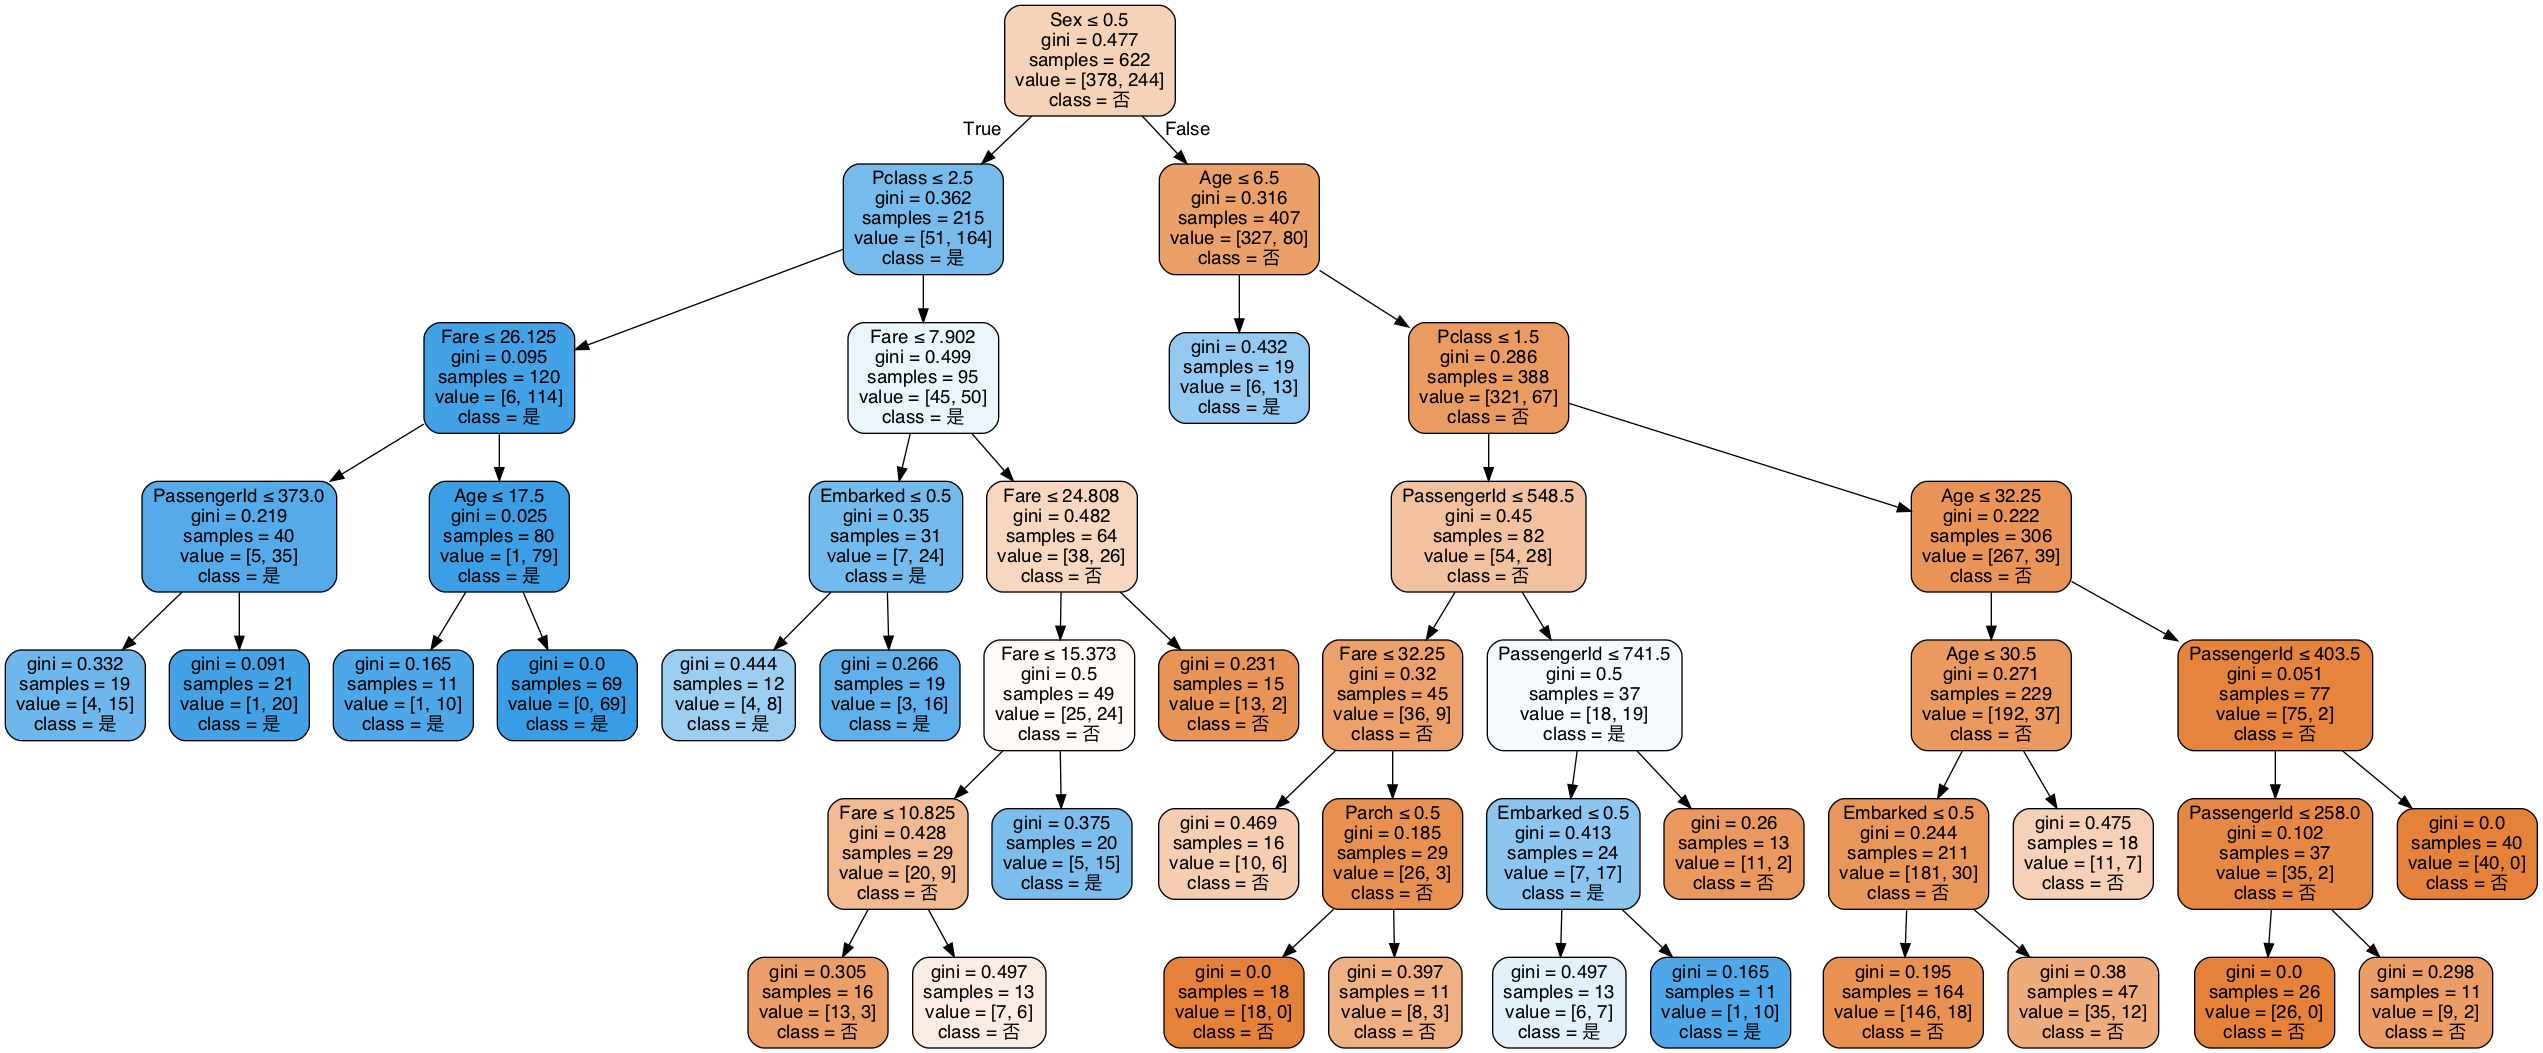

In [143]:
dot_tree= tree.export_graphviz(clf_best,out_file=None, 
                               feature_names=X.columns,
                                class_names=['否', '是'],
                                filled=True, rounded=True, 
                                special_characters=True)
graph_tree = pydotplus.graph_from_dot_data(dot_tree)
#graph_tree.write_png("tree4.png") 

from IPython.display import Image
Image(graph_tree.create_png())

## 决策树回归案例

### 导入需要的算法库和模块

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import linear_model

### 构建数据集

In [21]:
x = np.array(list(range(1, 11))).reshape(-1, 1)
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [23]:
y = np.array([5.56, 5.70, 5.91, 6.40, 6.80, 7.05, 8.90, 8.70, 9.00, 9.05]).reshape(-1, 1)
y

array([[5.56],
       [5.7 ],
       [5.91],
       [6.4 ],
       [6.8 ],
       [7.05],
       [8.9 ],
       [8.7 ],
       [9.  ],
       [9.05]])

### 建立回归模型（树回归和线性回归）

In [24]:
model1 = tree.DecisionTreeRegressor(max_depth=1)
model2 = tree.DecisionTreeRegressor(max_depth=3)
model3 = linear_model.LinearRegression()
model1.fit(x, y)
model2.fit(x, y)
model3.fit(x, y)

LinearRegression()

### 看一下模型预测的效果

In [25]:
X_test = np.arange(0.0, 10.0, 0.01)[:, np.newaxis]

In [26]:
y_1 = model1.predict(X_test)
y_2 = model2.predict(X_test)
y_3 = model3.predict(X_test)

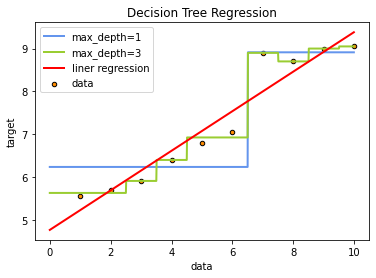

In [27]:
plt.figure()
plt.scatter(x, y, s=20, edgecolor="black",c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",label="max_depth=1", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=3", linewidth=2)
plt.plot(X_test, y_3, color='red', label='liner regression', linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

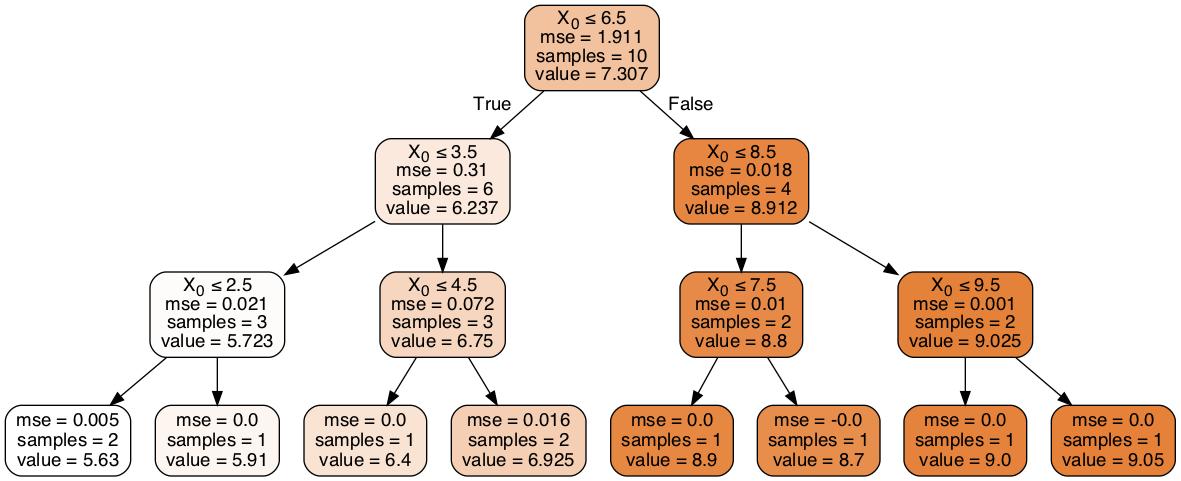

In [31]:
dot_tree= tree.export_graphviz(model2,out_file=None, 
                                filled=True, rounded=True, 
                                special_characters=True)
graph_tree = pydotplus.graph_from_dot_data(dot_tree)
#graph_tree.write_png("tree4.png") 

from IPython.display import Image
Image(graph_tree.create_png())

## 1.5 基于决策数的人脸表情识别

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 导入原始数据

In [2]:
df=pd.read_csv("/Users/yangwei/Desktop/决策树实践/fer2013.csv")
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


**'0':'anger',     #生气**  
**'1':'disgust',   #厌恶**  
**'2':'fear',      #恐惧**  
**'3':'happy',     #开心**  
**'4':'sad',       #伤心**  
**'5':'surprised', #惊讶**  
**'6':'normal',    #中性**

In [3]:
pixels = df.loc[:,'pixels'].values

print(pixels.shape)
print(type(pixels))

(35887,)
<class 'numpy.ndarray'>


### 转换像素为图片正确的格式，并分出特征和输出

In [4]:
px = []
for x in pixels : 
    x = x.split(" ")
    x = [float(t) for t in x]
    px.append(x)

In [5]:
x = np.array(px)
print(x.shape)

(35887, 2304)


In [6]:
y = df.loc[:, 'emotion'].values
print(y.shape)
print(type(y))

(35887,)
<class 'numpy.ndarray'>


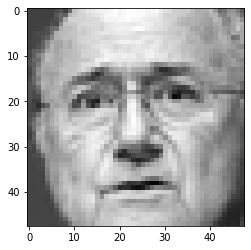

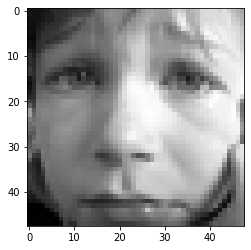

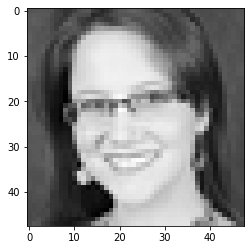

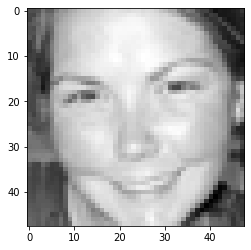

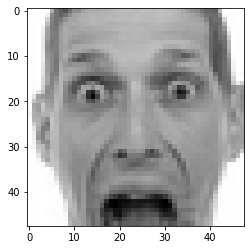

In [7]:
for ix in range(5,10):
    plt.figure(ix)
    plt.imshow(x[ix].reshape((48, 48)), interpolation='none', cmap='gray')
    plt.show()

In [29]:
#可以将其全部转换为图片，图片名字的形式为图片编号_表情类别
for ix in range(35887): 
    img=x[ix].reshape((48, 48))
    plt.imsave('/Users/yangwei/Desktop/决策树实践/表情图/'+str(ix)+"_"+str(y[ix])+".jpg",img, cmap="gray")

### 粗略跑一下决策树模型的效果

In [8]:
from sklearn import tree

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [10]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.3)

In [11]:
clf=tree.DecisionTreeClassifier(random_state=25)
clf=clf.fit(Xtrain, Ytrain)

In [40]:
score_ = clf.score(Xtest, Ytest)
score_ 

0.3165227082752856

In [ ]:
score = cross_val_score(clf,x,y,cv=10).mean()#使用交叉验证
score

**效果很不好**

### 数据增强

Augmentor是一个Python包，旨在帮助机器学习任务的图像数据人工生成和数据增强。它主要是一种数据增强工具，但也将包含基本的图像预处理功能

Augmentor图片增强分3步：
（1）实例化Pipeline 对象，通过指定包含要处理图片所在的目录；
（2）定义数据增强操作，crop、rotate等等，添加到pipeline中；
（3）调用pipeline的sample(n)函数，同时指定增强后的样本总量；
https://augmentor.readthedocs.io/en/master/userguide/mainfeatures.html

In [12]:
import Augmentor

In [13]:
#指定图片所在目录
p = Augmentor.Pipeline("/Users/yangwei/Desktop/决策树实践/表情图/")

Initialised with 35887 image(s) found.
Output directory set to /Users/yangwei/Desktop/决策树实践/表情图/output.

In [16]:
# 增强操作
# 旋转 概率0.3，向左最大旋转角度10，向右最大旋转角度10
p.rotate(probability=0.3,max_left_rotation=10, max_right_rotation=10)

#水平翻转
p.flip_left_right(probability=0.4)

#垂直翻转
p.flip_top_bottom(probability=0.1)

#裁剪
p.crop_by_size(probability=0.1,width=48,height=48)

In [17]:
# 指定增强后图片数目总量
p.sample(100000)

Processing <PIL.Image.Image image mode=RGB size=48x48 at 0x20E0ADD90>: 100%|█████████▉| 99542/100000 [06:48<00:00, 522.98 Samples/s]                  